# 정면 이미지에 스티커 적용

In [ ]:
#!pip install cmake opencv-python
#!conda install -y dlib

In [101]:
import matplotlib.pyplot as plt
import numpy as np

In [102]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.12.0
19.24.6


## 이미지로드

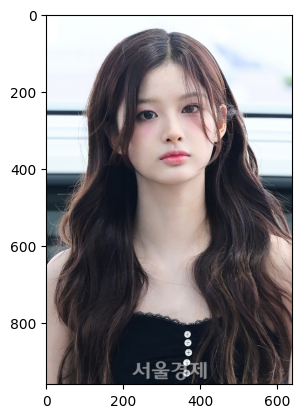

In [103]:
my_image_path = "/content/face.png"
img_bgr = cv2.imread(my_image_path)                 # 이미지 로드
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # BRG → RGB 변환
img_show = img_bgr.copy()                           # 출력용 이미지를 따로 보관
plt.imshow(img_rgb)                                 # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show()

## 얼굴 검출
bounding box를 먼저 찾고 box 내부의 keypoint를 예측하는 top-down 방식으로 진행할

In [104]:
# detector 선언
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기

# 얼굴의 bounding box 추출
ing_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트 (여러 얼굴이 있을 수 있음)
print(dlib_rects)

rectangles[[(216, 192) (439, 415)]]


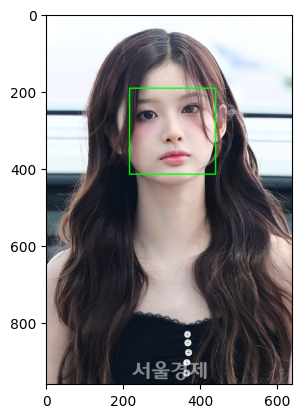

In [105]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()   # 왼쪽
    t = dlib_rect.top()    # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 랜드마크 검출

모델의 weight file을 다운로드 후 압축 해제

In [ ]:
#!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
#!bzip2 -d /content/shape_predictor_68_face_landmarks.dat.bz2

--2025-10-21 13:34:04--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-10-21 13:34:05--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  16.4MB/s    in 3.7s    

2025-10-21 13:34:09 (16.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [106]:
# 모델 로드
landmark_predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")

In [107]:
# 랜드마크의 위치를 저장할 list
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾고,
# face landmark 좌표를 저장한다.
for dlib_rect in dlib_rects:
    # 모든 landmark의 위치 정보를 points 변수에 저장
    points = landmark_predictor(img_rgb, dlib_rect)

    # 각각의 landmark 위치 정보를 (x,y) 형태로 변환하여 list_points 리스트에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))

    # list_landmarks에 랜드마크 리스트를 저장
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # 이미지의 얼굴이 한 개 있으므로 [0]을 호출

68


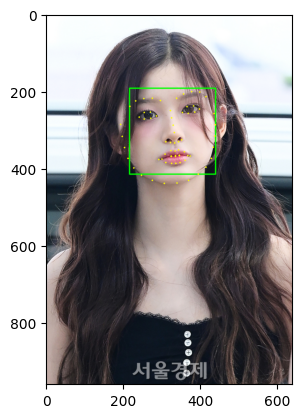

In [108]:
# list_landmarks의 원소하 한 개(이미지의 얼굴이 하나) 있으므로 아래 반복문은 한 번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고, (0, 255, 255)의 색으로 내부가 채워진(-1) 원을 그린다.
            # 마지막 인수가 자연수라면 그 만큼의 두께의 선으로 원이 그려진다.

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 적용

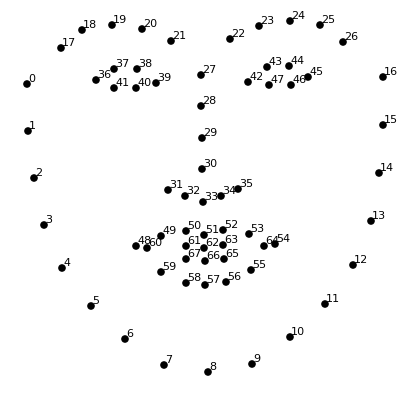

In [109]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값 (얼굴 영역 박스 리스트)
# → rectangles[[(216, 192) (439, 415)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(193, 286), (197, 317), (203, 346), (212, 374), (227, 399), (247, 418), (275, 431), (306, 439), (339, 438), (369, 431), (394, 415), (414, 397), (428, 374), (433, 345), (437, 316), (438, 287), (435, 258), (217, 239), (232, 225), (253, 219), (275, 218), (296, 224), (338, 218), (356, 207), (377, 201), (398, 202), (414, 214), (322, 250), (325, 269), (329, 288), (332, 307), (310, 331), (322, 333), (333, 334), (343, 331), (351, 326), (241, 267), (254, 255), (270, 254), (286, 264), (271, 270), (254, 272), (353, 255), (365, 240), (382, 238), (397, 246), (385, 254), (368, 257), (292, 377), (308, 363), (323, 354), (334, 355), (343, 352), (358, 357), (373, 368), (360, 379), (347, 385), (336, 387), (325, 387), (310, 385), (300, 376), (324, 368), (335, 367), (345, 366), (367, 367), (345, 367), (335, 369), (324, 369)]]

# 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30]) # 코 끝의 index: 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})') # 코의 중심점
    print (f'(w,h) : ({w},{h})')

(332, 307)
(x,y) : (332,307)
(w,h) : (224,224)


In [110]:
# 스티커 이미지 로드
img_sticker = cv2.imread("/content/cat-whiskers.png") # cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정
print (img_sticker.shape) # 사이즈를 조정한 고양이 코 이미지의 차원 확인

(224, 224, 3)


In [111]:
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정해야 한다.
# 이미지 시작점은 top-left(왼쪽 상단) 좌표이기 때문이다.
# 즉, refined_x, refined_y값에서 스티커 이미지가 시작된다.
refined_x = x - w // 2
refined_y = y - h // 2

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (220,195)


In [112]:
# 스티커 이미지 적용
# 좌표 순서가 y, x임에 유의한다. (y, x, rgb channel)
sticker_area = img_show[refined_y : refined_y + img_sticker.shape[0],
                        refined_x : refined_x + img_sticker.shape[1]]

# 스티커 이미지 배경을 투명 처리

# 1. 스티커에서 흰색 배경 부분만 찾기 (R,G,B 3채널이 모두 255인 곳)
condition_2d = np.all(img_sticker == 255, axis=-1)

# 2. 2D 맵을 3D(h, w, 3)로 다시 확장하여 sticker_area, img_sticker와 shape을 맞춘다.
condition_3d = condition_2d[..., np.newaxis]

img_show[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(condition_3d, sticker_area, img_sticker).astype(np.uint8)

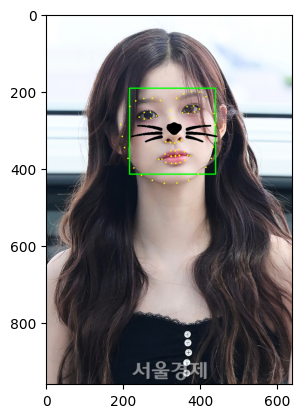

In [113]:
# 스티커 적용 이미지
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

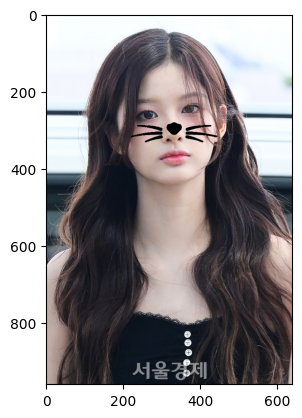

In [114]:
# 최종 이미지
sticker_area = img_bgr[refined_y : refined_y + img_sticker.shape[0],
                        refined_x : refined_x + img_sticker.shape[1]]

condition_2d = np.all(img_sticker == 255, axis=-1)
condition_3d = condition_2d[..., np.newaxis]

img_bgr[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(condition_3d, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 고양이 귀 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

# 기울어진 얼굴 이미지도 잘 잡을까?

### 새로운 이미지로 얼굴 검출 시도

rectangles[]


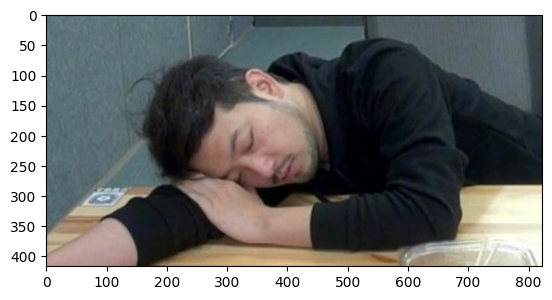

In [ ]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 준비 단계 ---
# 필요한 파일 경로 설정
img_path = "/content/스크린샷 2025-10-21 144457.png"
sticker_path = "cat-whiskers.png"

# --- 2. 모델 및 이미지 로드 ---
detector_hog = dlib.get_frontal_face_detector()
img_bgr = cv2.imread(img_path)
img_sticker = cv2.imread(sticker_path)

img_show = img_bgr.copy() # 복사본 생성

# --- 3. 얼굴 검출 ---
# 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트 (여러 얼굴이 있을 수 있음)
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()   # 왼쪽
    t = dlib_rect.top()    # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

눈을 감아서인지 누워 있어서인지, 얼굴 검출을 못 하는 것을 알 수 있다.  
그렇다면 이 이미지가 아닌, 원본(설윤) 이미지를 회전시켜도 얼굴을 못 잡을까?


### 원본 이미지를 회전시켜서 얼굴 검출 시도

In [ ]:
#!pip install imgaug

In [115]:
from PIL import Image
from torchvision import transforms
import torchvision.transforms.functional as F

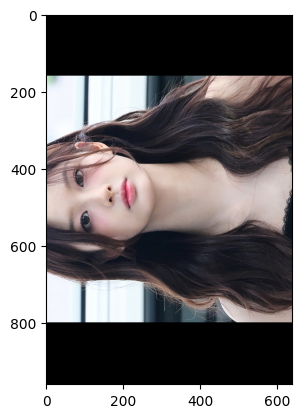

In [116]:
# --- 1. 이미지 로드 및 회전 ---
image = Image.open("/content/face.png")

transform = transforms.Compose(
    [
        transforms.Lambda(lambda img: F.rotate(img, angle=90)),
    ]
)

transformed_image = transform(image)
plt.imshow(transformed_image)

rectangles[]


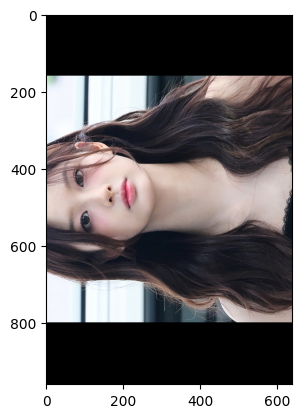

In [117]:
sticker_path = "cat-whiskers.png"

# --- 2. 모델 및 스티커 이미지 로드 ---
detector_hog = dlib.get_frontal_face_detector()
#img_bgr = cv2.imread(test_img_path)
img_sticker = cv2.imread(sticker_path)

# # PIL → numpy 변환
img_rgb = np.array(transformed_image)

# --- 3. 얼굴 검출 ---
# 얼굴의 bounding box 추출
dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트 (여러 얼굴이 있을 수 있음)
print(dlib_rects)

img_show = img_rgb.copy()

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()   # 왼쪽
    t = dlib_rect.top()    # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

plt.imshow(img_show)
plt.show()

원본 이미지를 90도 회전시킨 이미지 역시 얼굴 검출을 하지 못 하는 모습이다.  



dlib.get_frontal_face_detector()는 정면 이미지의 얼굴만 검출할 수 있기 때문에, 회전된 이미지에 대해서는 검출이 불가능하다는 점이 실패의 이유일 것이라고 예상한다.

# 이번엔 밝기를 조절해보자

In [118]:
# --- 1. 모델, 이미지 로드 ---
image_path = "/content/face.png"

detector = dlib.get_frontal_face_detector()
img_bgr = cv2.imread(image_path)

In [119]:
# --- 2. 이미지 밝기 조절 ---
alpha = 1 # 대비 (1: 유지)
beta_list = [-400, -390, -380, 130, 140, 150] # 밝기 (양수: 밝게, 음수: 어둡게)

for beta in beta_list:
    img_result_cv = cv2.convertScaleAbs(img_bgr, alpha=alpha, beta=beta)
    # 얼굴의 bounding box 추출
    img_rgb = cv2.cvtColor(img_result_cv, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

    # 찾은 얼굴 영역 박스 리스트 (여러 얼굴이 있을 수 있음)
    print(f"beta: {beta}, dlib_rects: {dlib_rects}")

beta: -400, dlib_rects: rectangles[]
beta: -390, dlib_rects: rectangles[[(216, 192) (439, 415)]]
beta: -380, dlib_rects: rectangles[[(216, 192) (439, 415)]]
beta: 130, dlib_rects: rectangles[[(200, 171) (468, 439)]]
beta: 140, dlib_rects: rectangles[]
beta: 150, dlib_rects: rectangles[]


음수의 밝기에서는 약 -390,  
양수의 밝기에서는 약 130까지 얼굴 검출이 가능했다.



이제 밝은 이미지와 어두운 이미지의 차이를 알아보자

### 밝은 이미지

rectangles[[(200, 171) (468, 439)]]


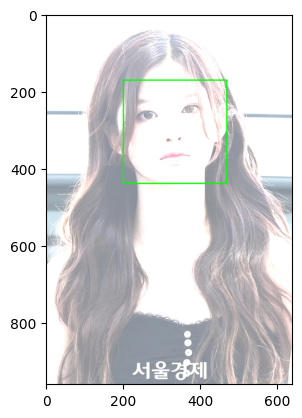

In [129]:
# 밝기: 130
alpha = 1
beta = 130

img_result_cv = cv2.convertScaleAbs(img_bgr, alpha=alpha, beta=beta)

img_show = img_result_cv.copy() # 복사본 생성

# --- 3. 얼굴 검출 ---
# 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_result_cv, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트 (여러 얼굴이 있을 수 있음)
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()   # 왼쪽
    t = dlib_rect.top()    # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

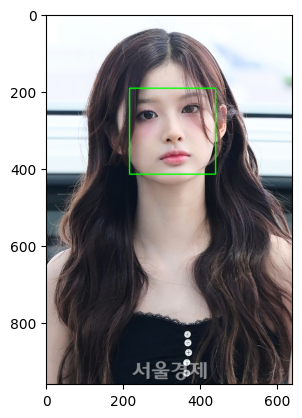  


위의 그림과 비교해보니, 밝기를 올렸을 때 박스의 영역이 약간 커졌다는 점을 발견할 수 있었다.

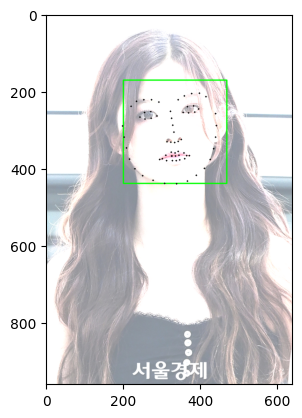

In [130]:
# --- 랜드마크 검출 ---
landmark_predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 0, 0), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(331, 306)
(x,y) : (331,306)
(w,h) : (269,269)


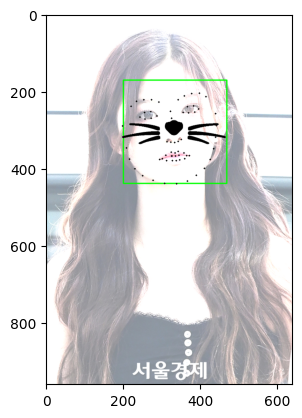

In [131]:
# --- 스티커 적용 ---
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30]) # 코 끝의 index: 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})') # 코의 중심점
    print (f'(w,h) : ({w},{h})')

img_sticker = cv2.imread("/content/cat-whiskers.png")
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y - h // 2

sticker_area = img_show[refined_y : refined_y + img_sticker.shape[0],
                        refined_x : refined_x + img_sticker.shape[1]]

condition_2d = np.all(img_sticker == 255, axis=-1)
condition_3d = condition_2d[..., np.newaxis]

img_show[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(condition_3d, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

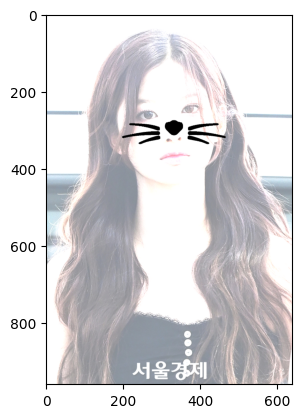

In [132]:
# 최종 이미지
sticker_area = img_result_cv[refined_y : refined_y + img_sticker.shape[0],
                        refined_x : refined_x + img_sticker.shape[1]]

condition_2d = np.all(img_sticker == 255, axis=-1)
condition_3d = condition_2d[..., np.newaxis]

img_result_cv[refined_y : refined_y + img_sticker.shape[0],
             refined_x : refined_x + img_sticker.shape[1]] = \
        np.where(condition_3d, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_result_cv, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 고양이 귀 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

### 어두운 이미지

rectangles[[(216, 192) (439, 415)]]


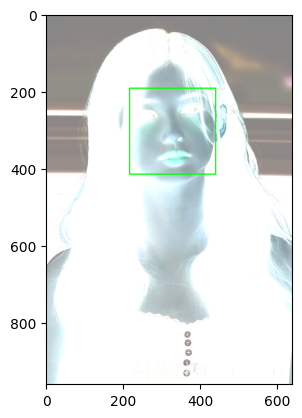

In [ ]:
# 밝기: -390
alpha = 1
beta = -390

img_result_cv = cv2.convertScaleAbs(img_bgr, alpha=alpha, beta=beta)

img_show = img_result_cv.copy() # 복사본 생성

# --- 3. 얼굴 검출 ---
# 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_result_cv, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트 (여러 얼굴이 있을 수 있음)
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()   # 왼쪽
    t = dlib_rect.top()    # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

beta 값을 극단적으로 낮췄더니 어두운 게 아니라 색상 반전이 되어버렸는데, cv2.convertScaleAbs()는 계산 후 절댓값을 취하기 때문에 일정 값이 넘어가면 오히려 beta값이 커져서 밝아지게 되고, 색상 반전처럼 보이는 현상이 나타난다.

그래도 얼굴 검출은 된 모습이다.  
이 경우는 처음의 박스 영역과 거의 동일해 보인다.  

하지만, 이건 어두운 이미지라고 보기 어려우니 대비(alpha)값을 조절해서 다시 얼굴 검출을 해보겠다.

In [ ]:
alpha_list = [0.01, 0.05, 0.1, 0.2, 0.3]
beta = 0

for alpha in alpha_list:
    img_result_cv = cv2.convertScaleAbs(img_bgr, alpha=alpha, beta=beta)
    # 얼굴의 bounding box 추출
    img_rgb = cv2.cvtColor(img_result_cv, cv2.COLOR_BGR2RGB)
    dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

    # 찾은 얼굴 영역 박스 리스트 (여러 얼굴이 있을 수 있음)
    print(f"alpha: {alpha}, dlib_rects: {dlib_rects}")

alpha: 0.01, dlib_rects: rectangles[]
alpha: 0.05, dlib_rects: rectangles[]
alpha: 0.1, dlib_rects: rectangles[[(200, 171) (468, 439)]]
alpha: 0.2, dlib_rects: rectangles[[(200, 171) (468, 439)]]
alpha: 0.3, dlib_rects: rectangles[[(200, 171) (468, 439)]]


alpha 값이 약 0.05 부터는 얼굴 검출이 불가능해진다.

rectangles[[(200, 171) (468, 439)]]


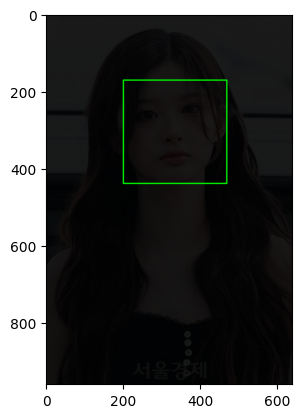

In [134]:
# 검출 가능한 최소 대비인 0.1 적용
alpha = 0.1
beta = 0

img_result_cv = cv2.convertScaleAbs(img_bgr, alpha=alpha, beta=beta)

img_show = img_result_cv.copy() # 복사본 생성

# --- 3. 얼굴 검출 ---
# 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_result_cv, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트 (여러 얼굴이 있을 수 있음)
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()   # 왼쪽
    t = dlib_rect.top()    # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

눈으로는 거의 안 보이지만 boundimg box는 성공적으로 찾아냈다.

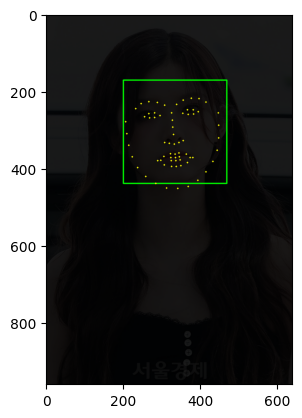

In [135]:
# --- 랜드마크 검출 ---
landmark_predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(330, 312)
(x,y) : (330,312)
(w,h) : (269,269)


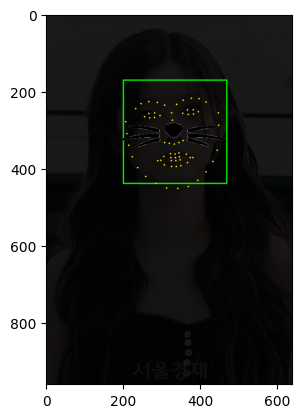

In [136]:
# --- 스티커 적용 ---
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30]) # 코 끝의 index: 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})') # 코의 중심점
    print (f'(w,h) : ({w},{h})')

img_sticker = cv2.imread("/content/cat-whiskers.png")
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y - h // 2

sticker_area = img_show[refined_y : refined_y + img_sticker.shape[0],
                        refined_x : refined_x + img_sticker.shape[1]]

condition_2d = np.all(img_sticker == 255, axis=-1)
condition_3d = condition_2d[..., np.newaxis]

img_show[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(condition_3d, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 마지막으로 촬영 거리를 더 멀게 해보자

rectangles[[(426, 140) (533, 247)]]


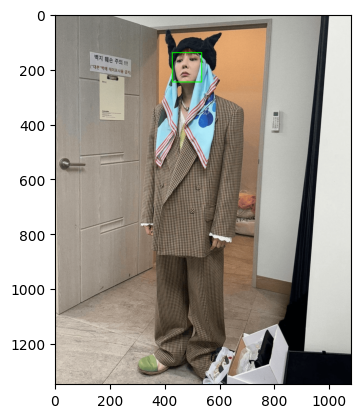

In [137]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 준비 단계 ---
# 필요한 파일 경로 설정
img_path = "/content/gd.png"
sticker_path = "cat-whiskers.png"

# --- 2. 모델 및 이미지 로드 ---
detector_hog = dlib.get_frontal_face_detector()
img_bgr = cv2.imread(img_path)
img_sticker = cv2.imread(sticker_path)

img_show = img_bgr.copy() # 복사본 생성

# --- 3. 얼굴 검출 ---
# 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트 (여러 얼굴이 있을 수 있음)
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()   # 왼쪽
    t = dlib_rect.top()    # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

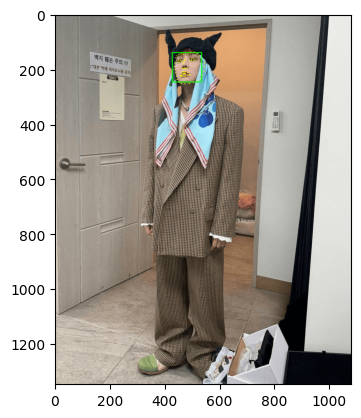

In [139]:
# --- 랜드마크 검출 ---
landmark_predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(466, 181)
(x,y) : (466,181)
(w,h) : (108,108)


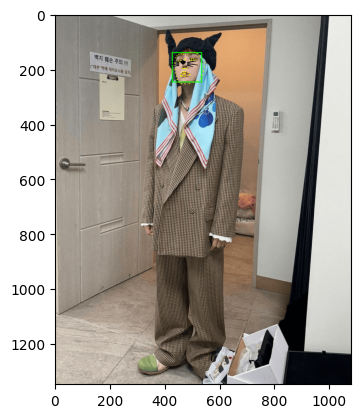

In [140]:
# --- 스티커 적용 ---
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30]) # 코 끝의 index: 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})') # 코의 중심점
    print (f'(w,h) : ({w},{h})')

img_sticker = cv2.imread("/content/cat-whiskers.png")
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y - h // 2

sticker_area = img_show[refined_y : refined_y + img_sticker.shape[0],
                        refined_x : refined_x + img_sticker.shape[1]]

condition_2d = np.all(img_sticker == 255, axis=-1)
condition_3d = condition_2d[..., np.newaxis]

img_show[refined_y : refined_y + img_sticker.shape[0],
         refined_x : refined_x + img_sticker.shape[1]] = \
    np.where(condition_3d, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

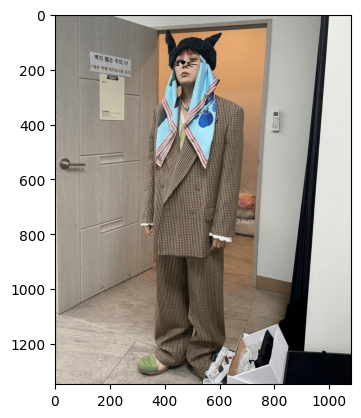

In [142]:
# 최종 이미지
sticker_area = img_bgr[refined_y : refined_y + img_sticker.shape[0],
                        refined_x : refined_x + img_sticker.shape[1]]

condition_2d = np.all(img_sticker == 255, axis=-1)
condition_3d = condition_2d[..., np.newaxis]

img_bgr[refined_y : refined_y + img_sticker.shape[0],
             refined_x : refined_x + img_sticker.shape[1]] = \
        np.where(condition_3d, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 고양이 귀 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

스티커가 자연스럽진 않지만, 그래도 코 끝을 중심으로 잘 적용된 모습이다.

### 더 작게 해보면?

rectangles[]


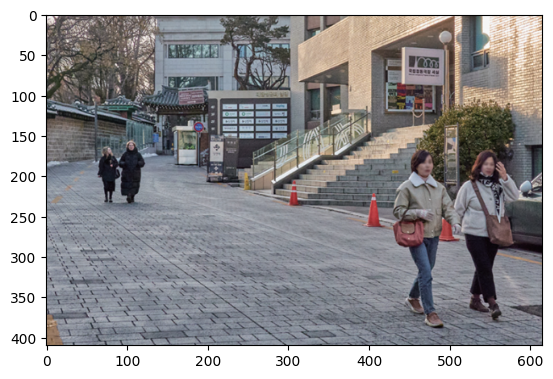

In [146]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 준비 단계 ---
# 필요한 파일 경로 설정
img_path = "/content/스크린샷 2025-10-22 003745.png"

# --- 2. 모델 및 이미지 로드 ---
detector_hog = dlib.get_frontal_face_detector()
img_bgr = cv2.imread(img_path)

img_show = img_bgr.copy() # 복사본 생성

# --- 3. 얼굴 검출 ---
# 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트 (여러 얼굴이 있을 수 있음)
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()   # 왼쪽
    t = dlib_rect.top()    # 위쪽
    r = dlib_rect.right()  # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

더 멀리서 촬영한 다른 사진으로 시도해 봤는데, bounding box는 찾을 수 없었다.

# 결론

기본 이미지:
- 스티커 적용까지 성공  

회전 이미지:
- bounding box 검출 불가  
- 이유는 detector_hog의 한계일 것으로 추측

밝은 이미지:
- 일정 임계값까지는 스티커 적용 가능  

어두운 이미지:
- 일정 임계값까지 스티커 적용 가능  

촬영 거리가 먼 이미지:
- 마찬가지로 어느 정도 이상으로 멀어지면 bounding box 검출 불가